In [42]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('notebook')

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from IPython.display import display
from sklearn.model_selection import *
from sklearn.metrics import *
from time import time

In [156]:
def tab_frequency(var):
    #var é uma series de um dataframa: var = base['numero_pessoas'], por exemplo, onde base é um df.
    return pd.DataFrame({
        'count': var.value_counts(dropna=False),
        'perc': round(var.value_counts(normalize=True, dropna=False)*100,1)
    })

def merge_report (left_data, right_data, how, on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=True, validate=None):
        final_data = pd.merge(left_data, right_data, how, on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=True, validate=None)

        print('Type merge: ' + how)
        print('# rows data 1: {}'.format(left_data.shape[0]))
        print('# rows data 2: {}'.format(right_data.shape[0]))
        print('# rows final data: {}'.format(final_data.shape[0]))        
        
        display(tab_frequency(final_data._merge))
        return final_data
    
def var_type (x):
    x = str(x)
    if x.find('int') >= 0:
        return 'int'
    elif x.find('float') >=0 :
        return 'float'
    elif x.find('object') >= 0:
        return 'object'    
    else:
        return 'outros'

In [31]:
data = pd.read_csv('Pasta1.csv', sep=';', decimal=',')
data2 = pd.read_csv('Pasta1 - Copia.csv', sep=';', decimal=',')


In [49]:
data.head()

,Id,Id2,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11
0,1,1,rhaissa,rhaissa,1.0,1.0,1.20,1.20,1.0,0.0,1.0,1.0,NaN
1,2,2,beatriz,fernanda,2.0,2.0,1.34,1.34,1.0,0.0,2.0,0.0,NaN
2,2,2,vilma,NaN,NaN,NaN,1.20,1.20,1.0,0.0,3.0,1.0,NaN
3,3,1,NaN,NaN,5.0,2.0,6.70,6.70,1.0,0.0,4.0,0.0,NaN
4,5,5,rhaissa,NaN,4.0,3.0,3.40,3.40,1.0,0.0,5.0,1.0,NaN


In [61]:
import seaborn as sns

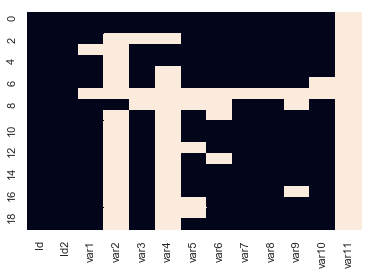

In [62]:
sns.heatmap(data.isnull(), cbar=False)

In [59]:
data2

,Id,var1,var2,var3,var4,var5,var6,var9,var10
0,1,rhaissa,rhaissa,1.0,1.0,1.200000,1.200000,1.0,1.0
1,2,beatriz,fernanda,2.0,2.0,1.340000,1.340000,2.0,0.0
2,45,vilma,NaN,NaN,NaN,1.200000,1.200000,3.0,1.0
3,3,NaN,NaN,5.0,2.0,6.700000,6.700000,4.0,0.0
4,5,rhaissa,NaN,4.0,3.0,3.400000,3.400000,5.0,1.0
5,6,luiz,NaN,3.0,NaN,3.100000,3.100000,6.0,0.0
6,7,rhaissa,NaN,2.0,NaN,0.900000,0.900000,7.0,NaN
7,8,NaN,NaN,NaN,NaN,NaN,NaN,8.0,0.0
8,9,sandra,adelmo,NaN,NaN,NaN,NaN,NaN,1.0
9,10,rhaissa,NaN,1.0,NaN,8.868095,NaN,10.0,1.0


In [34]:
data.var1.value_counts()

rhaissa     4
rhaissa8    2
rhaissa3    1
sandra      1
rhaissa5    1
rhaissa2    1
rhaissa1    1
luiz        1
rhaissa6    1
rhaissa9    1
rhaissa7    1
vilma       1
rhaissa4    1
beatriz     1
Name: var1, dtype: int64

In [196]:
tab_frequency(data2.var1)

,count,perc
rhaissa,7,35.0
beatriz,5,25.0
vilma,4,20.0
NaN,2,10.0
sandra,1,5.0
luiz,1,5.0


In [197]:
data2

,Id,var1,var2,var3,var4,var5,var6,var9,var10
0,1,rhaissa,rhaissa,1.0,1.0,1.200000,1.200000,1.0,1.0
1,2,beatriz,fernanda,2.0,2.0,1.340000,1.340000,2.0,0.0
2,45,vilma,NaN,NaN,NaN,1.200000,1.200000,3.0,1.0
3,3,NaN,NaN,5.0,2.0,6.700000,6.700000,4.0,0.0
4,5,rhaissa,NaN,4.0,3.0,3.400000,3.400000,5.0,1.0
5,6,luiz,NaN,3.0,NaN,3.100000,3.100000,6.0,0.0
6,7,rhaissa,NaN,2.0,NaN,0.900000,0.900000,7.0,NaN
7,8,NaN,NaN,NaN,NaN,NaN,NaN,8.0,0.0
8,9,sandra,adelmo,NaN,NaN,NaN,NaN,NaN,1.0
9,10,rhaissa,NaN,1.0,NaN,8.868095,NaN,10.0,1.0


In [422]:
class first_look_data:
    
    def __init__(self,d = None, ids = None, p= None):
        self.data = d
        self.ids = ids
        self.perc_missing = p
        
        
    def check_keys (self):
        
        if (self.data[self.ids].isnull().sum().sum() == 0):
            print("There is no missing data in primary keys.")
        else:
            print("Checking - missing data in primary keys.")

        check = self.data.groupby(self.ids).size().reset_index(name = 'count')
        check.sort_values('count', ascending=False)
        dup = check[check['count'] > 1]
        if (dup.shape[0] == 0):
            print('There is no duplicated keys.')
        else:
            print("warning: there is %d duplicated keys" % dup.shape[0] )
            display(dup)
            return dup
    
    def get_missing_information (self):
        
        len_array = []
        for var in self.data.columns:
            current_len  = len(self.data[var].unique())
            len_array.append(current_len)

        missing = pd.DataFrame(np.array(self.data.isnull().sum()), columns = ['# missing'])

        p_missing = missing / data.shape[0]
        types = pd.DataFrame( np.array(self.data.dtypes), columns=['type'])

        qtd = pd.concat([pd.DataFrame(self.data.columns, columns=['var']), 
                         types.type, missing['# missing'], 
                         pd.DataFrame(p_missing),  
                         pd.DataFrame(len_array)], axis = 1)
        qtd.columns = ['var', 'type', '# missing','% missing','# unique values'] 
        qtd['type_resume'] = qtd['type'].apply(var_type)
        #####
        #display(qtd)
        return qtd
        
        
    def check_features (self):
        
        qtd = self.get_missing_information()
        
        n_sup_20_miss = len(list(filter(lambda x: x >= self.perc_missing, qtd['% missing'])))
        if n_sup_20_miss > 0:
            print ("There is %d features (%.1f%%) with more than %.0f%% of missing data" % (n_sup_20_miss, n_sup_20_miss*100/data.shape[1],
                                                                                           self.perc_missing*100))
        display(qtd)       
        cols_zero = qtd[qtd['# unique values'] == 1].loc[:, 'var'].values
        if len(cols_zero) == 0:
            print('No columns with same information inside.')
        else:
            print('WARNING: columns with same information inside: {}'.format(cols_zero))
        # info complementar

    def check_lines (self):
        data['vec_miss'] = self.data.isnull().sum(axis = 1)
        n_var = len(data.columns) - len(self.ids) - 1
        qtd_empty_rows = len(list(filter(lambda x: x == n_var, data['vec_miss'])))
        if qtd_empty_rows > 0:
            empty_data = data[data.vec_miss == n_var]
            print('{} empty rows:'.format(empty_data.shape[0]))
            display(empty_data.head())
            index_exclude_rows = data[data.vec_miss == n_var ].index
            display(index_exclude_rows)
            
        n_complete = len(list(filter(lambda x: x == 0, data['vec_miss'])))
        n_sup_80_mmiss = len (list(filter(lambda x: x/(data.shape[1]-1-len(self.ids)) > 0.8, data['vec_miss'])))

        print ("Possui %d das linhas (%.1f%%) contendo 100%% das variáveis\n" % (n_complete, n_complete*100/data.shape[0]))

        if n_sup_80_mmiss > 0:
            print ("ATENÇÃO: Possui %d das linhas (%.1f%%) contendo mais de 80%% de variáveis com dados faltantes\n" % (n_sup_80_mmiss, n_sup_80_mmiss*100/data.shape[0]))

            
    def get_missing_information_graph (self):
        sns.heatmap(self.data.isnull(), cbar=False)
        
        
    def simple_report (self):
        print ('Data with', self.data.shape[0], 'samples and ', self.data.shape[1], 'features')
        #cheking duplicate keys
        print("\n")
        print("----------------------------------------- KEYS INFORMATION -------------------------------------------\n")
        self.check_keys()    
        print("---------------------------------------- FEATURES INFORMATION ----------------------------------------\n")
        self.check_features()
        print("-------------------------------------- MISSING ROWS INFORMATION --------------------------------------\n")
        self.check_lines()
        print("--------------------------------------- GRAPH MISSING INFORMATION ------------------------------------\n")
        self.get_missing_information_graph()
        

In [423]:
describe_data = first_look_data(data, ['Id', 'Id2'], 0.3)

In [424]:
a = describe_data.check_keys()

There is no missing data in primary keys.


,Id,Id2,count
1,2,2,2
8,10,10,2


In [425]:
b = describe_data.get_missing_information()
b

,var,type,# missing,% missing,# unique values,type_resume
0,Id,int64,0,0.00,18,int
1,Id2,int64,0,0.00,17,int
2,var1,object,2,0.10,15,object
3,var2,object,17,0.85,4,object
4,var3,float64,3,0.15,7,float
5,var4,float64,16,0.80,4,float
6,var5,float64,5,0.25,15,float
7,var6,float64,4,0.20,16,float
8,var7,float64,1,0.05,2,float
9,var8,float64,1,0.05,2,float


In [426]:
c = describe_data.check_features()

There is 3 features (21.4%) with more than 30% of missing data


,var,type,# missing,% missing,# unique values,type_resume
0,Id,int64,0,0.00,18,int
1,Id2,int64,0,0.00,17,int
2,var1,object,2,0.10,15,object
3,var2,object,17,0.85,4,object
4,var3,float64,3,0.15,7,float
5,var4,float64,16,0.80,4,float
6,var5,float64,5,0.25,15,float
7,var6,float64,4,0.20,16,float
8,var7,float64,1,0.05,2,float
9,var8,float64,1,0.05,2,float


In [427]:
d = describe_data.check_lines()

1 empty rows:


,Id,Id2,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,vec_miss
7,8,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11


Int64Index([7], dtype='int64')

Possui 0 das linhas (0.0%) contendo 100% das variáveis

ATENÇÃO: Possui 1 das linhas (5.0%) contendo mais de 80% de variáveis com dados faltantes



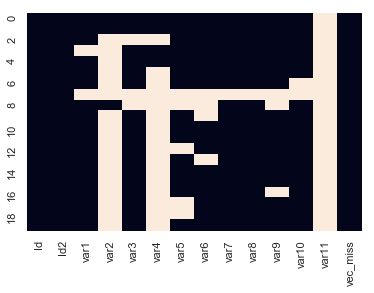

In [428]:
describe_data.get_missing_information_graph()

Data with 20 samples and  14 features


----------------------------------------- KEYS INFORMATION -------------------------------------------

There is no missing data in primary keys.


,Id,Id2,count
1,2,2,2
8,10,10,2


---------------------------------------- FEATURES INFORMATION ----------------------------------------

There is 3 features (21.4%) with more than 30% of missing data


,var,type,# missing,% missing,# unique values,type_resume
0,Id,int64,0,0.00,18,int
1,Id2,int64,0,0.00,17,int
2,var1,object,2,0.10,15,object
3,var2,object,17,0.85,4,object
4,var3,float64,3,0.15,7,float
5,var4,float64,16,0.80,4,float
6,var5,float64,5,0.25,15,float
7,var6,float64,4,0.20,16,float
8,var7,float64,1,0.05,2,float
9,var8,float64,1,0.05,2,float


-------------------------------------- MISSING ROWS INFORMATION --------------------------------------

1 empty rows:


,Id,Id2,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,vec_miss
7,8,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11


Int64Index([7], dtype='int64')

Possui 0 das linhas (0.0%) contendo 100% das variáveis

ATENÇÃO: Possui 1 das linhas (5.0%) contendo mais de 80% de variáveis com dados faltantes

--------------------------------------- GRAPH MISSING INFORMATION ------------------------------------



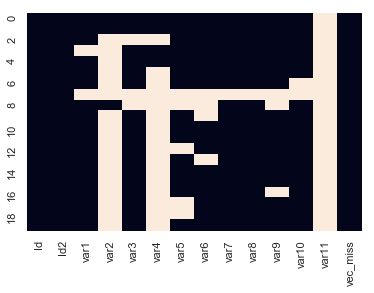

In [429]:
e = describe_data.simple_report()